# Data Prep

In [148]:
import pandas as pd, numpy as np

In [149]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [150]:
#use wget to download the data i.e csv file
!wget $data

--2025-10-09 09:53:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.06s   

2025-10-09 09:53:33 (13.2 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [151]:
## read the csv file content and store it in a variable named df
df = pd.read_csv('car_fuel_efficiency.csv')

In [152]:
#Make all the columns of the data uniform, by making all the texts be in lowercase and having no spaces in between them
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [153]:
#get data types and counts
print(df.dtypes)
df.dtypes.value_counts()
df['horsepower'].describe()

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object


count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [154]:
#find columns that have object type (not int or float) 
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [155]:
#iterate over each value of object and standerdise the input as earlier
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
df[col]


0         all-wheel_drive
1       front-wheel_drive
2       front-wheel_drive
3         all-wheel_drive
4         all-wheel_drive
              ...        
9699    front-wheel_drive
9700      all-wheel_drive
9701      all-wheel_drive
9702    front-wheel_drive
9703      all-wheel_drive
Name: drivetrain, Length: 9704, dtype: object

# Exploratory data analysis

In [156]:
for col in df.columns:
    print(f"column name: {col}")
    print(f"first 5 unique values from the column {col}: {df[col].unique()[:5]}")
    print(f"number of unique value in the column {col}: {df[col].nunique()}")
    print('---------------------------------')

column name: engine_displacement
first 5 unique values from the column engine_displacement: [170 130 220 210 190]
number of unique value in the column engine_displacement: 36
---------------------------------
column name: num_cylinders
first 5 unique values from the column num_cylinders: [ 3.  5. nan  4.  1.]
number of unique value in the column num_cylinders: 14
---------------------------------
column name: horsepower
first 5 unique values from the column horsepower: [159.  97.  78.  nan 140.]
number of unique value in the column horsepower: 192
---------------------------------
column name: vehicle_weight
first 5 unique values from the column vehicle_weight: [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
number of unique value in the column vehicle_weight: 9704
---------------------------------
column name: acceleration
first 5 unique values from the column acceleration: [17.7 17.8 15.1 20.2 14.4]
number of unique value in the column acceleration: 162
------

In [157]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,europe,diesel,front-wheel_drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,usa,gasoline,all-wheel_drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,usa,diesel,all-wheel_drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,usa,diesel,front-wheel_drive,1.0,15.331551


### Distribution of fuel efficiency

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

#to make sure the plot is displayed in the notbebook
%matplotlib inline 

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

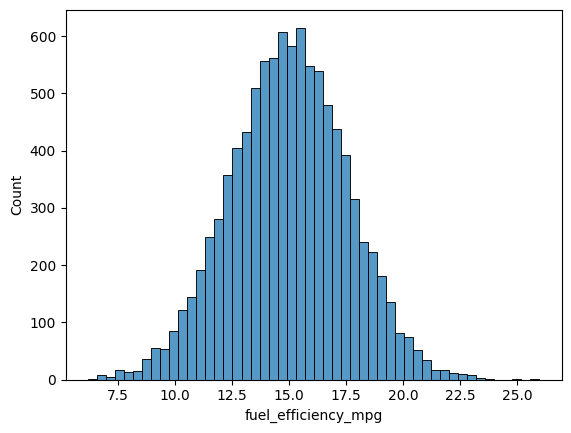

In [159]:
# Plot a histogram of the fuel_efficiency_mpg
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [160]:
print("No it does not have long tail i.e.  no long small counts of numbers")

No it does not have long tail i.e.  no long small counts of numbers


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

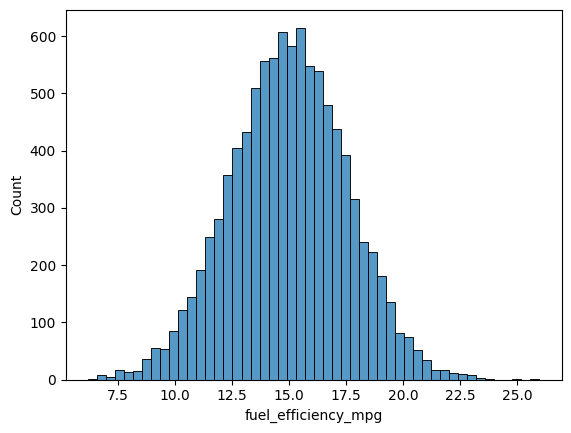

In [161]:
# zoom out to see smaller numbers at the tail
sns.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 30], bins=50)


We can dampen the effect of large fuel_efficiency_mpg values on the distribution by applying a log transform to it.



In [162]:
np.log1p([0, 1, 10, 100, 1000, 10000, 100000])


array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

Notice that as the value increases by 10, it's logarithm increases by about 2.3. Therefore, the log function can be used to downscale the data.

Note the log1p function is used to add 1 to the values. This is to handle the case if 0s appearing in the data (since log 0 is undefined).

In [163]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000+1]) == np.log1p([0, 1, 10, 1000, 100000])


array([ True,  True,  True,  True,  True])

In [164]:
# Applying the log transform to fuel_efficiency_mpg
fuel_efficiency_logs = np.log1p(df.fuel_efficiency_mpg)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

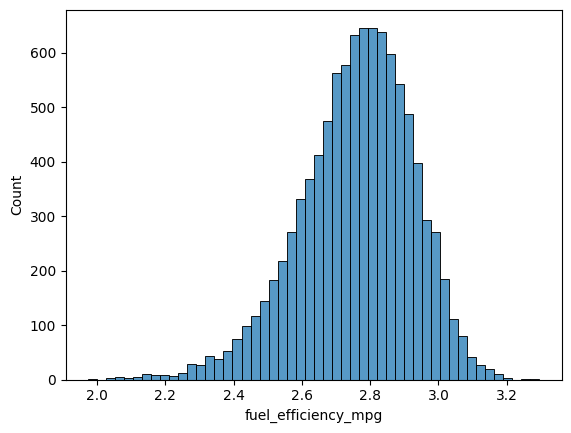

In [165]:
# Plot histogram over all prices
sns.histplot(fuel_efficiency_logs, bins=50)

The log transform makes the distribution look approximately normally distributed

Missing values

In [166]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

We'll handle the missing values before training our model

# Setting up the validation framework

Splitting the dataset into train,validation and test sets.

Training set: 60% of the data

Validation set: 20% of the data

Test set: 20% of the data

In [167]:
# No. of rows
n = len(df)

# Using percentages for all sets
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

total_size = n_val + n_test + n_train

n, n_train, n_val, n_test, total_size

(9704, 5822, 1940, 1940, 9702)

We see that when using percentages for all sets, the total size of our new sets is less than the original dataset.

A better approach would be to use the size remaining after subtracting the sizes for validation and test sets as the training set size.

In [168]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

total_size = n_val + n_test + n_train

n, n_train, n_val, n_test, total_size

(9704, 5824, 1940, 1940, 9704)

We see that the training set gets 2 more records (rows) than before

In [169]:
# We can select random indices from the dataset like this
df.iloc[[10, 0, 3, 5]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
10,230,5.0,100.0,3111.810181,15.4,2014,europe,diesel,all-wheel_drive,0.0,13.386605
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,europe,gasoline,all-wheel_drive,-1.0,17.271818


In [170]:
# Use slicing to select train, val and test sets
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [171]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


A problem with this approach is that the data isn't shuffled. This can cause some cars to be misrepresented among different sets.

E.g. usa appears in training set but not validation set.

Therefore, it's a good idea to shuffle the data

In [172]:
# Gives an array from 0 to the specified number itself. This will help in what we're trying to do.
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [173]:
# We're shuffling the indexes so that we are able to get random datapoints out of the dataset 
# This is so that we are able to reduce any bias by any previous points
np.random.seed(42)
np.random.shuffle(idx)

In [174]:
# Use slicing to select train, val and test sets
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all-wheel_drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all-wheel_drive,NaN,19.402209


In [175]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [176]:
# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all-wheel_drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all-wheel_drive,NaN,19.402209


In [177]:
# Applying the log transform to the fuel_efficiency_mpg values in all sets and storing them in a separate variable i.e Transformation of the y (target) values
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [178]:
# Deleting the fuel_efficiency_mpg column from our sets to prevent the model from learning the fuel_efficiency_mpg values 
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [179]:
# Checking if the y values match the no. of rows in each set
len(y_train) == n_train, len(y_val) == n_val, len(y_test) == n_test

(True, True, True)

# Linear Regression

Linear regression is a model for solving regression problems, in which the expected output of the model is a real number. The objective of linear regression is to create a line that best fits the data which can then be used to make predictions on new values. The input of this model is a feature matrix X and the output is a vector of predictions y trying to be as close as possible to the actual y values.

$$
g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}
$$

Where:

- \( w_0 \): prediction if no features exist  
- \( n \): the number of features  
- \( w_j \): corresponding weight of feature \( j \)  
- \( x_{ij} \): the value of feature \( j \) for observation \( i \)


In [180]:
# Checking the 10th row (engine)
df_train.iloc[10]

engine_displacement                  240
num_cylinders                        2.0
horsepower                         159.0
vehicle_weight               2916.987921
acceleration                        16.3
model_year                          2001
origin                              asia
fuel_type                       gasoline
drivetrain             front-wheel_drive
num_doors                            1.0
Name: 10, dtype: object

In [181]:
# Hypothetical features for 1 engine (row/sample)
# # From index number 10: We choose engine_displacement, horsepower and vehicle_weight 
# you’re essentially setting the parameters manually rather than learning them from data.
xi = [240, 159, 2916]

# Defining arbitrary bias: A constant added to the output, independent of input features.
w0 = 7.17

# Defining arbitrary weights: A Coefficients that scale each input feature.
w = [0.01, 0.04, 0.002]

In [182]:
# Python code for how the linear regression works, but in a more general sense 
def linear_regression(xi):
    # number of features in the feature matrix
    n = len(xi)
    
    # We have an initial bias term W0, so that is the starting of our prediction.
    pred = w0
    
    # Recursive feature whereby the feature + the weight/bias is being added.
    # Range(n) starts at 0 and ends at n-1 by default
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    # End product 
    return pred

In [183]:
linear_regression(xi)


21.762

In [184]:
# Since we did log1p just now, we have to reverse it so we do a exponential first and then we minus 1.
np.expm1(21.762)

np.float64(2825637951.6575494)

In [185]:
np.log1p(22825637951.6575494)

np.float64(23.851150212769937)

# Linear regression vector form

The general formula, as mentioned above, is:

g(xi) = W0 + summation(1,n) (w[j] * xi[j])

However, it can be written as another form. Specifically if we look at (w[j] * xi[j]),

g(xi) = w0 + xi^T * W

whereby xi^T is the transpose of xi

Why is this so?

- Recall that both the weights and feature matrices are vectors, with size (n,1) whereby n is the number of features.
- Since the number of weights = number of features, they both have the same size.
- However, in order for vector-vector multiplication to occur, the first vector needs to have the same number of columns as the number of rows of the second vector.
- We can either transpose the weights or we can transpose the feature matrix.
- In this case, we transpose xi so that we are able to get a matrix with size (1,n).
- Since we want to get the inner product, we will use xi^T W so we get a product of (1,1) aka the prediction (instead of W Xi ^T)
- Finally, the vector-vector multiplication occurs, and we get the 'prediction'.

(Note: We can transpose either vector, but since we're going with the transpose of xi, we have to make sure that we change the position of the matrices as the position affects the product of matrix-matrix multiplication, or in this case, vector-vector multiplication.)

In [186]:
# Do note that this dot product only starts from weight 1 and feature 1. We have to consider w0, which will be covered.
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [187]:
# Inclusion of weight 0 
def linear_regression(xi):
    return w0 + dot(xi, w)

In [188]:
# w is a list in this case, we can join two lists together to get the full matrix. 
w_new = [w0] + w

In [189]:
w_new


[7.17, 0.01, 0.04, 0.002]

In [190]:
# Why do we add [1] here? It is to consider w0. 
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [191]:
linear_regression(xi)

21.762

In [192]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [193]:
# We always have 1s in the beginning because of w0.
# If we do 0 instead, it means that there will be no w0 when we do the multiplication, which makes it incorrect.
x1  = [1, 198, 14, 2385]
x2  = [1, 112, 25, 2091]
x10 = [1, 240, 159, 2916]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  198,   14, 2385],
       [   1,  112,   25, 2091],
       [   1,  240,  159, 2916]])

In [194]:
def linear_regression(X):
    return X.dot(w_new)

In [195]:
linear_regression(X)

array([14.48 , 13.472, 21.762])

# Training a linear regression model

In [196]:
X = [
    [198,   14, 2385],
    [112,   25, 2091],
    [240,  159, 2916],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 198,   14, 2385],
       [ 112,   25, 2091],
       [ 240,  159, 2916],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [197]:
# Why do we need this? This is for the initial bias term. 
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [198]:
# Adding the 1s to the first column of each row
X = np.column_stack([ones, X])

In [199]:
# Defining the target vector
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [200]:
# Finding of the weights 
# XTX is the Gram matrix which is a square matrix. This square matrix can almost always be inverted.
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [201]:
w0 = w_full[0]      # Bias
w = w_full[1:]      # Rest of the weights corresponding to each feature

In [202]:
w0, w

(np.float64(18946.069048996265),
 array([-7.71263167, -2.40751928, -0.90171909]))

Wrapping all that we did above in a function. We will extend this function in later sections.

In [229]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# Car Fuel Efficiency baseline model


Let's use the Linear Regression function created above on the dataset

In [230]:
df_train.columns
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg,num_doors_2,num_doors_3,num_doors_4
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729,0,0,0
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217,0,0,0
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341,0,0,0
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736,1,0,0
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369,1,0,0


In [231]:
# Selecting the columns we think might be important in determining the price of a car
base = ['engine_displacement', 'horsepower', 'vehicle_weight',
        'model_year']

X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [232]:
w0,w

(np.float64(3.664665965202821),
 array([ 2.14827135e-06,  2.21209296e-04, -3.23460699e-04,  1.64674632e-05]))

Plotting the predicted and actual (log transformed)

<Axes: ylabel='Count'>

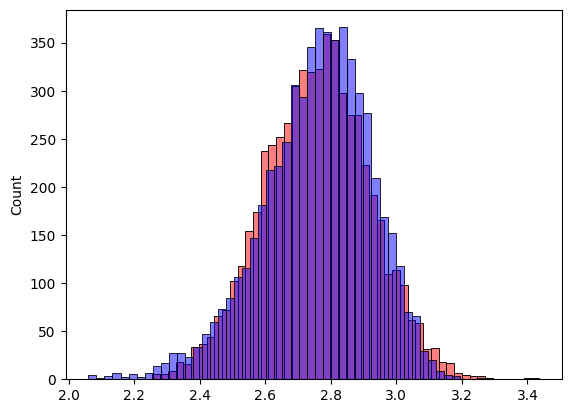

In [233]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE

Root Mean Square Error (RMSE) gives us a metric to objectively see the performance of our Linear Regression model.

To take this step by step:

1. Find the squared error, aka the square of error between the actual value of y and the predicted values of y.
2. The mean squared error the mean of the squared errors themselves.
3. Lastly, root means to square root the MSE.

In [234]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [235]:
rmse(y_train, y_pred)

np.float64(0.03908632539265251)

# Validating the model

In [236]:
# This is the same code as the steps taken in earlier, but applied to X_train and X_val. 
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [237]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.03997925780265369)

# Simple feature engineering

In [238]:
df['model_year'].max()

np.int64(2023)

In [ ]:
# We're simply just adding an 'age' category
# As seen above, the max year = 2023, therefore we are able to use '2023' and then derive the age from there.
def prepare_X(df):
    # We use a copy so as to prevent any changes for the old dataframe 
    df = df.copy()
    
    df['age'] = 2023 - df['model_year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [240]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.03997925782294756)

Comparing with Validating the model and Simple feature engineering, we can tell that there is a slight change to the RMSE itself - 0.0399 vs 0.2076. You can tell that there also is a difference between the previous histogram and the histogram below.



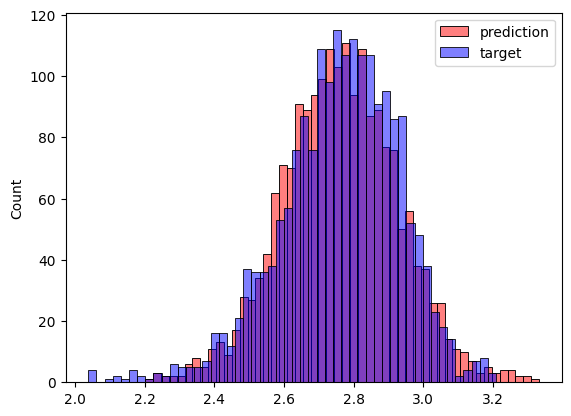

In [241]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Categorical variables

Let's deal with the categorical variables in the dataset. These variables have a fixed number of possible values (categories). The columns with object types

In [242]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
num_doors_2              int64
num_doors_3              int64
num_doors_4              int64
dtype: object

In [243]:
categorical_columns = [
    'origin', 'fuel_type', 'drivetrain']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
categorical


{'origin': ['asia', 'europe', 'usa'],
 'fuel_type': ['gasoline', 'diesel'],
 'drivetrain': ['all-wheel_drive', 'front-wheel_drive']}

We convert the categorical variables into numeric variables by a technique called One-Hot Encoding. This creates a new feature (column) in the dataset for each category for each categorical variable.

Observations that belong to a certain category will have it's feature value = 1 for that category and 0 for all other categories it doesn't belong to.

In [244]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2023 - df['model_year']
    features = base + ['age']

    # One-Hot encoding the categorical variables
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.num_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [245]:
# Footnote 2: What's really going on in this for loop? It seems rather confusing. Let's try to dissect it.
test = categorical.items()
print(test)
print('\n')
# items() allow a dictionary to be converted into a 2-dimensional list

for name, values in categorical.items():
    print(name)
    print(values)
# the first element in the list is the name of the column itself, while the second element are the values themselves
# therefore, we need a second for loop for the list itself to extract the different values 
# 

dict_items([('origin', ['asia', 'europe', 'usa']), ('fuel_type', ['gasoline', 'diesel']), ('drivetrain', ['all-wheel_drive', 'front-wheel_drive'])])


origin
['asia', 'europe', 'usa']
fuel_type
['gasoline', 'diesel']
drivetrain
['all-wheel_drive', 'front-wheel_drive']


In [250]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.040027482247374895)

In [251]:
w0, w

(np.float64(1.7976124877274448e-06),
 array([ 2.26411701e-06,  2.20882824e-04, -3.23443502e-04,  1.82787066e-03,
         1.80869940e-03,  3.34270834e-03,  2.57480213e-03, -8.30523295e-18,
         9.88781631e-05, -7.08275314e-04,  6.11194763e-04, -5.03015394e-04,
         5.04813007e-04,  1.21148979e-03, -1.20969217e-03]))

The RMSE and weight values increased in magnitude after adding these categorical features. We can solve this problem by using a technique called Regularization.

# Regularization

The reason we got a large RMSE and increased magnitude in the weights was because after One-Hot Encoding, many columns start looking similar to each other as shown below. We use regularisation to control the weight.

In [268]:
# Assume we have a matrix X with two columns of the same values.

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]
X = np.array(X)
X

# IF we have two columns with the same values, the gram matrix cannot be inversed as shown below.
# This is known as a singular matrix, which is a matrix containing the same rows and/or columns.
# Singular matrices are not inversible.

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [254]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [255]:
# Let's test if this is inversible or not!
try:
    print(np.linalg.inv(XTX))
except np.linalg.LinAlgError:
    print('Singular matrix, can\'t be inversed')

Singular matrix, can't be inversed


This is a problem as the gram matrix NEEDS to be inversed so that we can find the weights vector.

In [256]:
# Sometimes, there is noise in the dataset itself like in the last element of the last row. 
# In the original notebook, it is 5.00000001, but I still got a LinAlgError so I decided to make it a little noisier.
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [257]:
y= [1, 2, 3, 1, 2, 3]

In [258]:
# In this case, we can see that the matrix is now different and that there there are no columns with the same values.
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [259]:
# Let's test if this is inversible or not!
try:
    print(np.linalg.inv(XTX))
except np.linalg.LinAlgError:
    print('Singular matrix, can\'t be inversed')

[[ 3.93617173e-02 -1.76703047e+05  1.76703006e+05]
 [-1.76703046e+05  4.02107113e+13 -4.02107110e+13]
 [ 1.76703005e+05 -4.02107110e+13  4.02107106e+13]]


In [260]:
# Storing the XTX inverse as a variable.
XTX_inv = np.linalg.inv(XTX)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

However, even though there is an inverse, we can tell that the inverse has very, very big numbers which is a problem. It directly affects the weights matrix.

In [261]:
# Finding the weights of the metric
XTX_inv.dot(X.T).dot(y)

array([ 3.70835244e-01, -5.04106394e+06,  5.04106413e+06])

What we can do is that we can use regularization, which is adding a small number to the diagonal of our matrix. This allows us to counteract the big numbers itself instead. We have an example like that below.

In [262]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [263]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333338e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [264]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1],
    [2, 1, 1.0001]
]

XTX = np.array(XTX)

In [265]:
np.linalg.inv(XTX)

array([[-3.33366669e-01,  3.33350001e-01,  3.33350001e-01],
       [ 3.33350001e-01,  4.99991665e+03, -5.00008335e+03],
       [ 3.33350001e-01, -5.00008335e+03,  4.99991665e+03]])

We can tell that there is a very big difference in the 2 by 2 sub matrix at the bottom right corner itself. This shows the effect of regularization itself and how useful it is!

You might be wondering how to implement regularization in the model itself - here's how!

In [266]:
# Recall np.eye gives you an identity  matrix with the size n x n with the right parameters
XTX = XTX + 0.01 * np.eye(3)

In [267]:
np.linalg.inv(XTX)

array([[ -0.33672284,   0.33503094,   0.33503094],
       [  0.33503094,  49.42034681, -49.58955418],
       [  0.33503094, -49.58955418,  49.42034681]])

In [272]:
# Let's implement the regularization into our linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [273]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.04002748096265061)

# Tuning the model

In [274]:
# We're tuning the model with regularization, using 7 different values of r.
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 1.7976124877274448e-06 0.040027482247374895
1e-05 1.7976124877520776e-06 0.040027482246080465
0.0001 -7.597917980905247e-05 0.04002748256107001
0.001 5.304536768464582e-06 0.040027482207104545
0.1 1.8038078186479321e-06 0.040027469329944686
1 1.7947810563754472e-06 0.04002735543850086
10 1.7972800504103491e-06 0.040026381318763175


We can tell that 0.00001 has the lowest RMSE, followed by 0.0001, and lastly 0.001. Honestly, we can use either of the regularization values since the RMSE score has been about the same. In the example below, we use r = 0.001.

In [275]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.040027482207104545)

# Using the model

In [276]:
# Recall that for the Model Selection process, we combine train data and val data after using val data.
df_full_train = pd.concat([df_train, df_val])

In [277]:
df_full_train = df_full_train.reset_index(drop=True)

In [278]:
X_full_train = prepare_X(df_full_train)

In [279]:
X_full_train

array([[2.20000000e+02, 1.44000000e+02, 2.53588759e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60000000e+02, 1.41000000e+02, 2.74117048e+03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.30000000e+02, 1.55000000e+02, 2.47188024e+03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.30000000e+02, 2.02000000e+02, 3.30300069e+03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.20000000e+02, 1.69000000e+02, 3.29342025e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+02, 1.17000000e+02, 2.69278129e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [280]:
# We have to do that for y too.
y_full_train = np.concatenate([y_train, y_val])

In [283]:
# Training our linear regression model with the best r value found above and making predictions on the test set
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [284]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.03781747615307693)


The RMSE on the test set is 0.46

In a real world application, a web service would send data to our model in JSON format

In [285]:
engine = df_test.iloc[20].to_dict()
engine

{'engine_displacement': 160,
 'num_cylinders': 4.0,
 'horsepower': 125.0,
 'vehicle_weight': 3317.04204639791,
 'acceleration': 19.0,
 'model_year': 2018,
 'origin': 'europe',
 'fuel_type': 'diesel',
 'drivetrain': 'front-wheel_drive',
 'num_doors': -1.0}

We first need to convert it to a Pandas DataFrame

In [287]:
df_small = pd.DataFrame([engine])
df_small

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,160,4.0,125.0,3317.042046,19.0,2018,europe,diesel,front-wheel_drive,-1.0


We then clean the data and use our model to predict the price

In [288]:
X_small = prepare_X(df_small)

In [289]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(2.651803561430365)

We then remove the log transform to get the predicted price in dollars

In [294]:
prediction = np.expm1(y_pred)
prediction

np.float64(13.17958935777418)

In [295]:
test = np.expm1(y_test[20])
test


np.float64(12.779056293165823)

In [293]:
print('RMSE: ' + str((prediction - test)** 0.5))

RMSE: 0.6328768162986832
